# Random forest
## Обучение дерева на синтезированных данных -> проверка на реальных 
## Это будет являться критерием, по которому можно оценить соответствие синтезированных данных реальным. 
## (Задача бинарной классификации)
###  Обучение и проверка дерева на реальных данных дает дает разделение с roc_auc = 0.68, accuracy = 0.68. Возьмем эти данные за эталон

In [1]:
import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.utils import shuffle
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('example.csv')


data.drop(data.columns[[0]], axis  =1, inplace = True)

data = data.reset_index()
data.drop(data.columns[[0]], axis  =1, inplace = True)

In [3]:
data.drop('TimeAtHeightX1', axis = 1, inplace = True)
data.drop('TimeAtHeightX50', axis = 1, inplace = True)


for i in range(1, 49):
    data.drop('derivative'+str(i), axis = 1, inplace = True)

In [4]:
data

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,TimeAtHeightX41,TimeAtHeightX42,TimeAtHeightX43,TimeAtHeightX44,TimeAtHeightX45,TimeAtHeightX46,TimeAtHeightX47,TimeAtHeightX48,TimeAtHeightX49,label
0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,0.378235,...,0.658348,0.665132,0.672506,0.680703,0.689518,0.699322,0.711355,0.726471,0.750138,1
1,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,0.042679,...,0.163943,0.171323,0.180083,0.191627,0.204904,0.221085,0.245906,0.301545,0.378402,1
2,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,0.294935,...,0.715044,0.724368,0.734571,0.745698,0.758919,0.774868,0.795516,0.823985,0.867863,1
3,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,0.168961,...,0.506903,0.526141,0.547680,0.571324,0.600366,0.636143,0.677458,0.727276,0.796488,1
4,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,0.296698,...,0.726086,0.737063,0.749703,0.764410,0.780982,0.803437,0.837578,0.894687,0.952744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111235,0.035990,0.058350,0.077057,0.094282,0.111318,0.127929,0.144589,0.161491,0.179448,0.198949,...,0.554418,0.567419,0.581266,0.596480,0.612773,0.631398,0.652767,0.681386,0.737488,0
111236,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,0.188613,...,0.591379,0.612798,0.636970,0.664045,0.695117,0.730892,0.771073,0.813153,0.858648,0
111237,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,0.224162,...,0.677829,0.705044,0.733750,0.761717,0.789050,0.817002,0.846544,0.878350,0.922902,0
111238,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,0.178808,...,0.693225,0.711859,0.730127,0.748097,0.765897,0.785111,0.810062,0.848165,0.886060,0


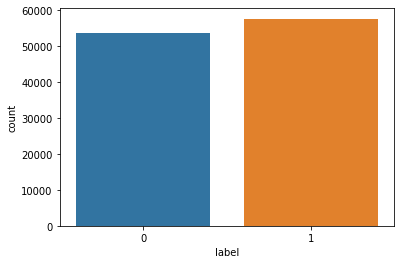

In [5]:
sns.countplot(x = 'label', data=data)

## Обучение

In [6]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data.iloc[:,0:-1],data.iloc[:,-1],test_size=0.3, random_state=1)

In [7]:
clf = RandomForestClassifier(n_estimators=100)
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [8]:
clf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Тест на синтезированных данных (другой выборке)

In [9]:
ypred = clf.predict_proba(test_X)

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(test_Y, ypred[:, 1])

In [15]:
thrs =0.5

In [17]:
ypred2 = (ypred[:, 1]>=thrs)

In [18]:
print ('accuracy = ' + str(metrics.accuracy_score(test_Y, ypred2)))

accuracy = 0.789673978185305


roc_auc = 0.7895214929196408


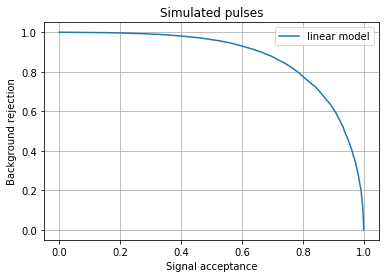

In [19]:
plt.plot( tpr,  np.abs(1-fpr), label = 'linear model')
plt.xlabel('Signal acceptance')
plt.ylabel('Background rejection')
plt.title('Simulated pulses')
plt.grid()
plt.legend()
print('roc_auc = '+ str(metrics.roc_auc_score(test_Y, ypred2)))

C:\Users\zaret\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zaret\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Simulated pulses')

<Figure size 2880x2160 with 0 Axes>

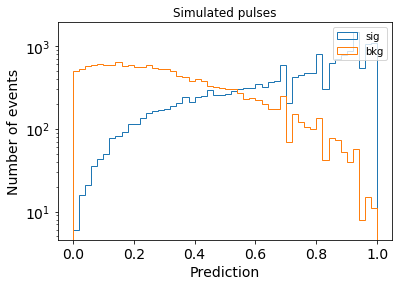

In [20]:
A = np.array(ypred[:,1])
idx_sig = np.where(test_Y == 1)[0] #signal
idx_bkg = np.where(test_Y == 0)[0]# выдает номера 


# Histogram predictions without error bars: #количес
bins = 50
fig14 = plt.figure(figsize=(40,30))
fig14, ax = plt.subplots()
n1, bins1, patches1 = ax.hist(A[[idx_sig]], histtype='step', label='sig', bins = bins)
n2, bins2, patches2 = ax.hist(A[[idx_bkg]], histtype='step', label='bkg', bins = bins)
ax.set_xlabel('Prediction', {'fontsize': 14})
ax.set_ylabel('Number of events', {'fontsize': 14})
plt.yticks((10**0, 10**1, 10**2, 10**3), color='k', size=14)
plt.xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0), color='k', size=14)
plt.yscale('log')
plt.legend(loc="upper right")
#fig14.savefig("predictions.pdf", bbox_inches='tight')
plt.title('Simulated pulses')

In [21]:
print ('f1= ' +str(metrics.f1_score(test_Y, ypred2)))

f1= 0.7970155296567281


In [22]:
sklearn.metrics.confusion_matrix(test_Y, ypred2)

array([[12573,  3427],
       [ 3592, 13780]], dtype=int64)

In [23]:
# tn, fp, 
# fn, tp

## Тест на реальных данных 

In [24]:
test_X = pd.read_csv('/Users/zaret/Desktop/gerda/ANG5_cal.csv')# загрузка реальных данных и удаление лишних столбцов
test_X.drop(test_X.columns[[0]], axis  =1, inplace = True)
test_Y = test_X['label']
test_X = test_X.drop('label', axis  =1)

test_X = test_X.drop('integral', axis = 1)

for i in range (1,49):
    test_X.drop('integral'+str(i), axis = 1, inplace = True)
    
test_X.drop('derivative49', axis = 1, inplace = True)


for i in range(1, 49):
    test_X.drop('derivative'+str(i), axis = 1, inplace = True)

In [25]:
ypred = clf.predict_proba(test_X)

In [26]:
ypred

array([[0.98, 0.02],
       [0.77, 0.23],
       [0.24, 0.76],
       ...,
       [0.11, 0.89],
       [0.31, 0.69],
       [0.95, 0.05]])

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(test_Y, ypred[:, 1])

In [32]:
thrs = 0.5

In [34]:
ypred2 = (ypred[:, 1]>=thrs)

In [35]:
print ('accuracy = ' + str(metrics.accuracy_score(test_Y, ypred2)))

accuracy = 0.6465405259675008


roc_auc = 0.6465405259675008


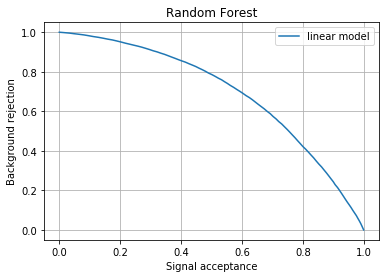

In [36]:
plt.plot( tpr,  np.abs(1-fpr), label = 'linear model')
plt.xlabel('Signal acceptance')
plt.ylabel('Background rejection')
plt.title('Random Forest')
plt.grid()
plt.legend()
print('roc_auc = '+ str(metrics.roc_auc_score(test_Y, ypred2)))

C:\Users\zaret\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zaret\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Random Forest')

<Figure size 2880x2160 with 0 Axes>

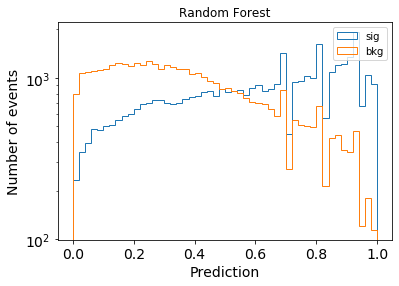

In [37]:
A = np.array(ypred[:,1])
idx_sig = np.where(test_Y == 1)[0] #signal
idx_bkg = np.where(test_Y == 0)[0]# выдает номера 


# Histogram predictions without error bars: #количес
bins = 50
fig14 = plt.figure(figsize=(40,30))
fig14, ax = plt.subplots()
n1, bins1, patches1 = ax.hist(A[[idx_sig]], histtype='step', label='sig', bins = bins)
n2, bins2, patches2 = ax.hist(A[[idx_bkg]], histtype='step', label='bkg', bins = bins)
ax.set_xlabel('Prediction', {'fontsize': 14})
ax.set_ylabel('Number of events', {'fontsize': 14})
plt.yticks((10**0, 10**1, 10**2, 10**3), color='k', size=14)
plt.xticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0), color='k', size=14)
plt.yscale('log')
plt.legend(loc="upper right")
#fig14.savefig("predictions.pdf", bbox_inches='tight')
plt.title('Random Forest')

In [38]:
print ('f1= ' +str(metrics.f1_score(test_Y, ypred2)))

f1= 0.6344035592511377


In [39]:
sklearn.metrics.confusion_matrix(test_Y, ypred2)

array([[27734, 13067],
       [15776, 25025]], dtype=int64)

In [40]:
# tn, fp, 
# fn, tp

## Вывод: по этому критерию синтезированные данные соответствуют реальным